In [1]:
# Artificial Neural Network building block test
# In this example it is shown how to build a single neuron,
# layer or feedforward neural networkd. It is also shown
# how to build and train a multilayer perceptron to solve
# the XOR problem
# 

from mlp_model import *
import numpy as np
from matplotlib import pyplot as plt
from random import shuffle


# First we define our activation function to 
def sigmoid(x):
    return 1/ (1+ np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# For hyperbolic tangent use np.tanh() and (1 - np.tanh(x)**2)
def d_tanh(x):
    return (1-np.tanh(x)**2)
                        
print(sigmoid(0))
print(d_sigmoid(0))


0.5
0.25


In [2]:
# Now we instantiate a single neuron
single_neuron = Neuron(sigmoid,d_sigmoid)
help(Neuron)
print( single_neuron.process(0) )
print( single_neuron.pre_activation )
print( single_neuron.post_activation ) 
print( single_neuron.process_d() )

Help on class Neuron in module mlp_model:

class Neuron(builtins.object)
 |  Neuron(act_func, d_act_func, pre_act=0, post_act=0)
 |  
 |  Basic neuron model used to build a single
 |  processing unit.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, act_func, d_act_func, pre_act=0, post_act=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  process(self, v)
 |  
 |  process_d(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

0.5
0
0.5
0.25


In [3]:
# Now instatiate a single layer we proceed as follows
single_layer = Layer(3, Neuron, sigmoid, d_sigmoid)
print("Neurons: ", single_layer.neurons)
layer_output = single_layer.process(np.zeros((3,1)))
d_layer_output = single_layer.process_d()
print("Layer output for column vector [0,0,0]^T as inputs:", layer_output)
print("Derivative outputs for column vector [0,0,0]^T as inputs:", d_layer_output)
print("Derivative shape: ",d_layer_output.shape)


Neurons:  [<mlp_model.Neuron object at 0x7854d007f4c0>
Layer output for column vector [0,0,0]^T as inputs: [[0.5]
 [0.5]
 [0.5]]
Derivative outputs for column vector [0,0,0]^T as inputs: [[0.25]
 [0.25]
 [0.25]]
Derivative shape:  (3, 1)


In [4]:
#Let's try a different input value for neurons:
layer_output = single_layer.process(np.array([0, -1, 1]).reshape(-1,1))
d_layer_output = single_layer.process_d()
print("Layer output: ", layer_output)
print("post activation: " , single_layer.post_activation)
print("pre activation", single_layer.pre_activation)
print("derivative outputs: ", d_layer_output)


Layer output:  [[0.5       ]
 [0.26894142]
 [0.73105858]]
post activation:  [[0.5       ]
 [0.26894142]
 [0.73105858]]
pre activation [[ 0]
 [-1]
 [ 1]]
derivative outputs:  [[0.25      ]
 [0.19661193]
 [0.19661193]]


In [5]:
# Now we repeat the procedure but compute local derivatives
# during forward processs:
#Let's try a different input value for neurons:
single_layer.local_derivatives = np.zeros((3,1))
layer_output = single_layer.process([0, -1, 1], learn=True)
print(layer_output)
print("post activation: " , single_layer.post_activation)
print("pre activation", single_layer.pre_activation)
print("derivative values: ", single_layer.local_derivatives)


[[0.5       ]
 [0.26894142]
 [0.73105858]]
post activation:  [[0.5       ]
 [0.26894142]
 [0.73105858]]
pre activation [[ 0]
 [-1]
 [ 1]]
derivative values:  [[0.25      ]
 [0.19661193]
 [0.19661193]]


In [6]:
# Now we build a [3,2,1] Feed Forward Neural Network with 2 processing layer and one bias per layer

layer_1 = Layer(2, Neuron, sigmoid, d_sigmoid)
layer_2 = Layer(1, Neuron, sigmoid, d_sigmoid)
ff_neural_network = FFNeuralNetwork([3 , 2 ,1],[layer_1,layer_2])

# To view weight matrices:
print("input-to-hidden layer weights: ", ff_neural_network.weights[0])
print("hidden-to-output layer weights: ", ff_neural_network.weights[1])

# To propagate a single input:
nn_out = ff_neural_network.process( np.array( [ [1], [2], [3] ]) ) 
print( nn_out )

input-to-hidden layer weights:  [[ 0.09762701  0.43037873  0.20552675  0.08976637]
 [-0.1526904   0.29178823 -0.12482558  0.783546  ]]
hidden-to-output layer weights:  [[ 0.92732552 -0.23311696  0.58345008]]
[[0.76859421]]


In [7]:
# Now we test the backpropagation algorithm for
# the [2,2,1] network that solves the XOR problem.
#layer_1 = Layer(2, Neuron, np.tanh, d_tanh)
#layer_2 = Layer(1, Neuron, np.tanh, d_tanh)

# For sigmoidal activation function
layer_1 = Layer(2, Neuron, sigmoid, d_sigmoid)
layer_2 = Layer(1, Neuron, sigmoid, d_sigmoid)

# We can change initial conditions by changing the rand_seed value
ff_neural_network = FFNeuralNetwork([2,2,1],[layer_1,layer_2])

x_in = [ [0, 0], [0, 1], [1, 0], [1, 1] ]
y_d = [ [0],  [1], [1], [0] ]

# lets test for some input before network training 
out = ff_neural_network.process(np.array(x_in[0]).reshape(-1,1), learn = True)
print("predicted outputs: ")

print("#1", ff_neural_network.layers[0].post_activation)
print("#2",  ff_neural_network.layers[1].post_activation)
print("derivatives:")
print("#1",  ff_neural_network.layers[0].local_derivatives)
print("#2",  ff_neural_network.layers[1].local_derivatives)

      

predicted outputs: 
#1 [[0.55120158]
 [0.57243386]]
#2 [[0.78701905]]
derivatives:
#1 [[0.2473784 ]
 [0.24475334]]
#2 [[0.16762006]]


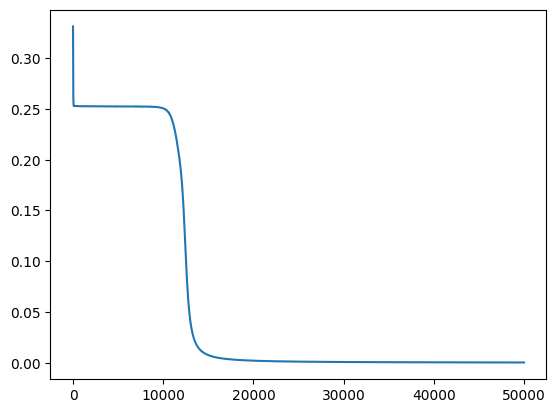

In [8]:
# now e perform the backpropagation traning
n_epochs = 50000
error = []
for epoch in range(n_epochs):
    data_idx = list(range(len(x_in)))
    shuffle(data_idx)
    e_s = 0
    for idx in data_idx:
        e = ff_neural_network.backprop(np.array(x_in[idx]).reshape(-1,1), np.array(y_d[idx]).reshape(-1,1), 0.1)
        e_s = e_s + e[0][0]**2
    error.append(e_s/len(x_in))
    # average squared error after one epoch

plt.figure()
plt.plot(error)

In [9]:
# Now we check to see if the error has decreased:
out = ff_neural_network.process(np.array(x_in[0]).reshape(-1,1), learn = False)
print("predicted output for [0, 0] ", out)
out = ff_neural_network.process(np.array(x_in[1]).reshape(-1,1), learn = False)
print("predicted output for [0, 1] ", out)
out = ff_neural_network.process(np.array(x_in[2]).reshape(-1,1), learn = False)
print("predicted output for [1, 0] ", out)
out = ff_neural_network.process(np.array(x_in[3]).reshape(-1,1), learn = False)
print("predicted output for [1, 1] ", out)


predicted output for [0, 0]  [[0.01900377]]
predicted output for [0, 1]  [[0.98197728]]
predicted output for [1, 0]  [[0.97841015]]
predicted output for [1, 1]  [[0.01694424]]
